 
## Exchange Rate Prediction


Currency exchange is one of the biggest financial markets. Currently, 1 United States dollar is equivalent to 82.2653 Indian rupees. Many factors affect exchange rates such as economic, political and even psychological factors. The prediction of the currency exchange rate is a difficult problem,In this project the task is currency exchange rate prediction with Machine Learning using Python.

We are using Machine Learning with the aim of finding the line that best fits the pattern of exchange rates over the years. That being said, Linear Regression would seemingly be the right model or, at least, the foundation for our analysis.

The primary tasks are as followed

1.   Installing yfinace library
2.   Importing dependencies and other library
3.   Importing the dataset using yfinance
4.   Understanding the dataset
5.   Visulization of dataset
6.   Linear regression model
7.   Conclusion




In [ ]:
import warnings
warnings.filterwarnings('ignore')

### yfinance is a popular open source library developed to access the financial data available on Yahoo Finance. Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies. It also offers market news, reports and analysis and additionally options and fundamentals data- setting it apart from some of it’s competitors.

### Why should I use the yfinance library?
*   Free
*   Quick and easy to set yourself up
*   Simple
*   High granularity of data (1min/2min/5min data)
*   Returns data directly in pandas dataframes/series






In [ ]:
# Installing yfinance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing all other dependencies and libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Downloading data from yahoo finance using yfinace library for a period of past 10 years
forex_data = yf.download('INR=X', start='2013-03-20', end='2023-03-22')

[*********************100%***********************]  1 of 1 completed


In [ ]:
fore_data = forex_data.to_csv('Forex_data.csv')

### The data imported using yfinance has

In [ ]:
# Changing index to data stamp
forex_data.index = pd.to_datetime(forex_data.index)

In [ ]:
# Arranging the data in ascending order to view recent market findings on top
forex_data = forex_data.sort_index(axis=1 ,ascending=True)
forex_data = forex_data.iloc[::-1]
forex_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-03-21,82.529099,82.529099,82.764297,82.490501,82.529099,0
2023-03-20,82.532997,82.532997,82.724297,82.439003,82.532997,0
2023-03-17,82.622803,82.622803,82.867798,82.420502,82.622803,0
2023-03-16,82.715698,82.715698,82.991997,82.586700,82.715698,0
2023-03-15,82.304901,82.304901,83.012497,82.185501,82.304901,0


In [ ]:
#Viewing last 5 records of data
forex_data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-03-26,54.167999,54.167999,54.463001,54.153000,54.286999,0
2013-03-25,54.342999,54.342999,54.320000,54.070000,54.320000,0
2013-03-22,54.278000,54.278000,54.426998,54.257999,54.423000,0
2013-03-21,54.349998,54.349998,54.368000,54.182999,54.323002,0
2013-03-20,54.368000,54.368000,54.537998,54.257999,54.443001,0


In [ ]:
# Check for the null values and general insights about data
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2606 entries, 2023-03-21 to 2013-03-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2606 non-null   float64
 1   Close      2606 non-null   float64
 2   High       2606 non-null   float64
 3   Low        2606 non-null   float64
 4   Open       2606 non-null   float64
 5   Volume     2606 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.5 KB


In [ ]:
# Checking the shape of data to know the number of rows and columns in the dataset
forex_data.shape

(2606, 6)

In [ ]:
# Checking the keys present in the data
forex_data.keys()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# Quick view in the statistical summary of the dataset
forex_data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.0
mean,68.772398,68.772398,68.992151,68.533598,68.758958,0.0
std,6.292792,6.292792,6.314322,6.284679,6.292298,0.0
min,53.658001,53.658001,53.748001,53.599998,53.658001,0.0
25%,64.029900,64.029900,64.163002,63.880001,64.035500,0.0
50%,67.930500,67.930500,68.141499,67.730003,67.893253,0.0
75%,73.698502,73.698502,73.888824,73.447350,73.698601,0.0
max,82.997002,82.997002,83.386002,82.779503,82.997002,0.0


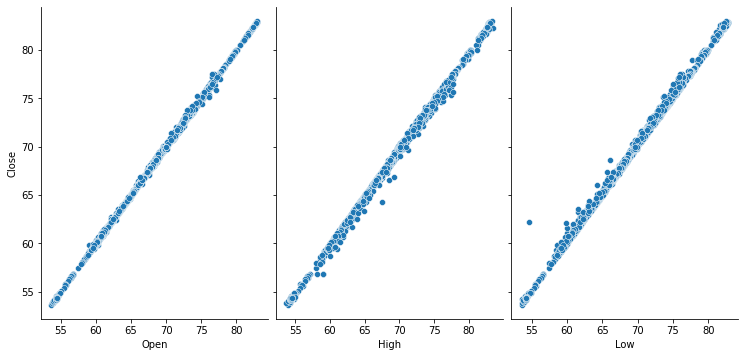

In [ ]:
# Plotting line graph to understand the trend in the data
sns.pairplot(forex_data, x_vars=['Open','High','Low'], y_vars='Close', size=5, aspect=0.7)

<Axes: xlabel='Date', ylabel='Close'>

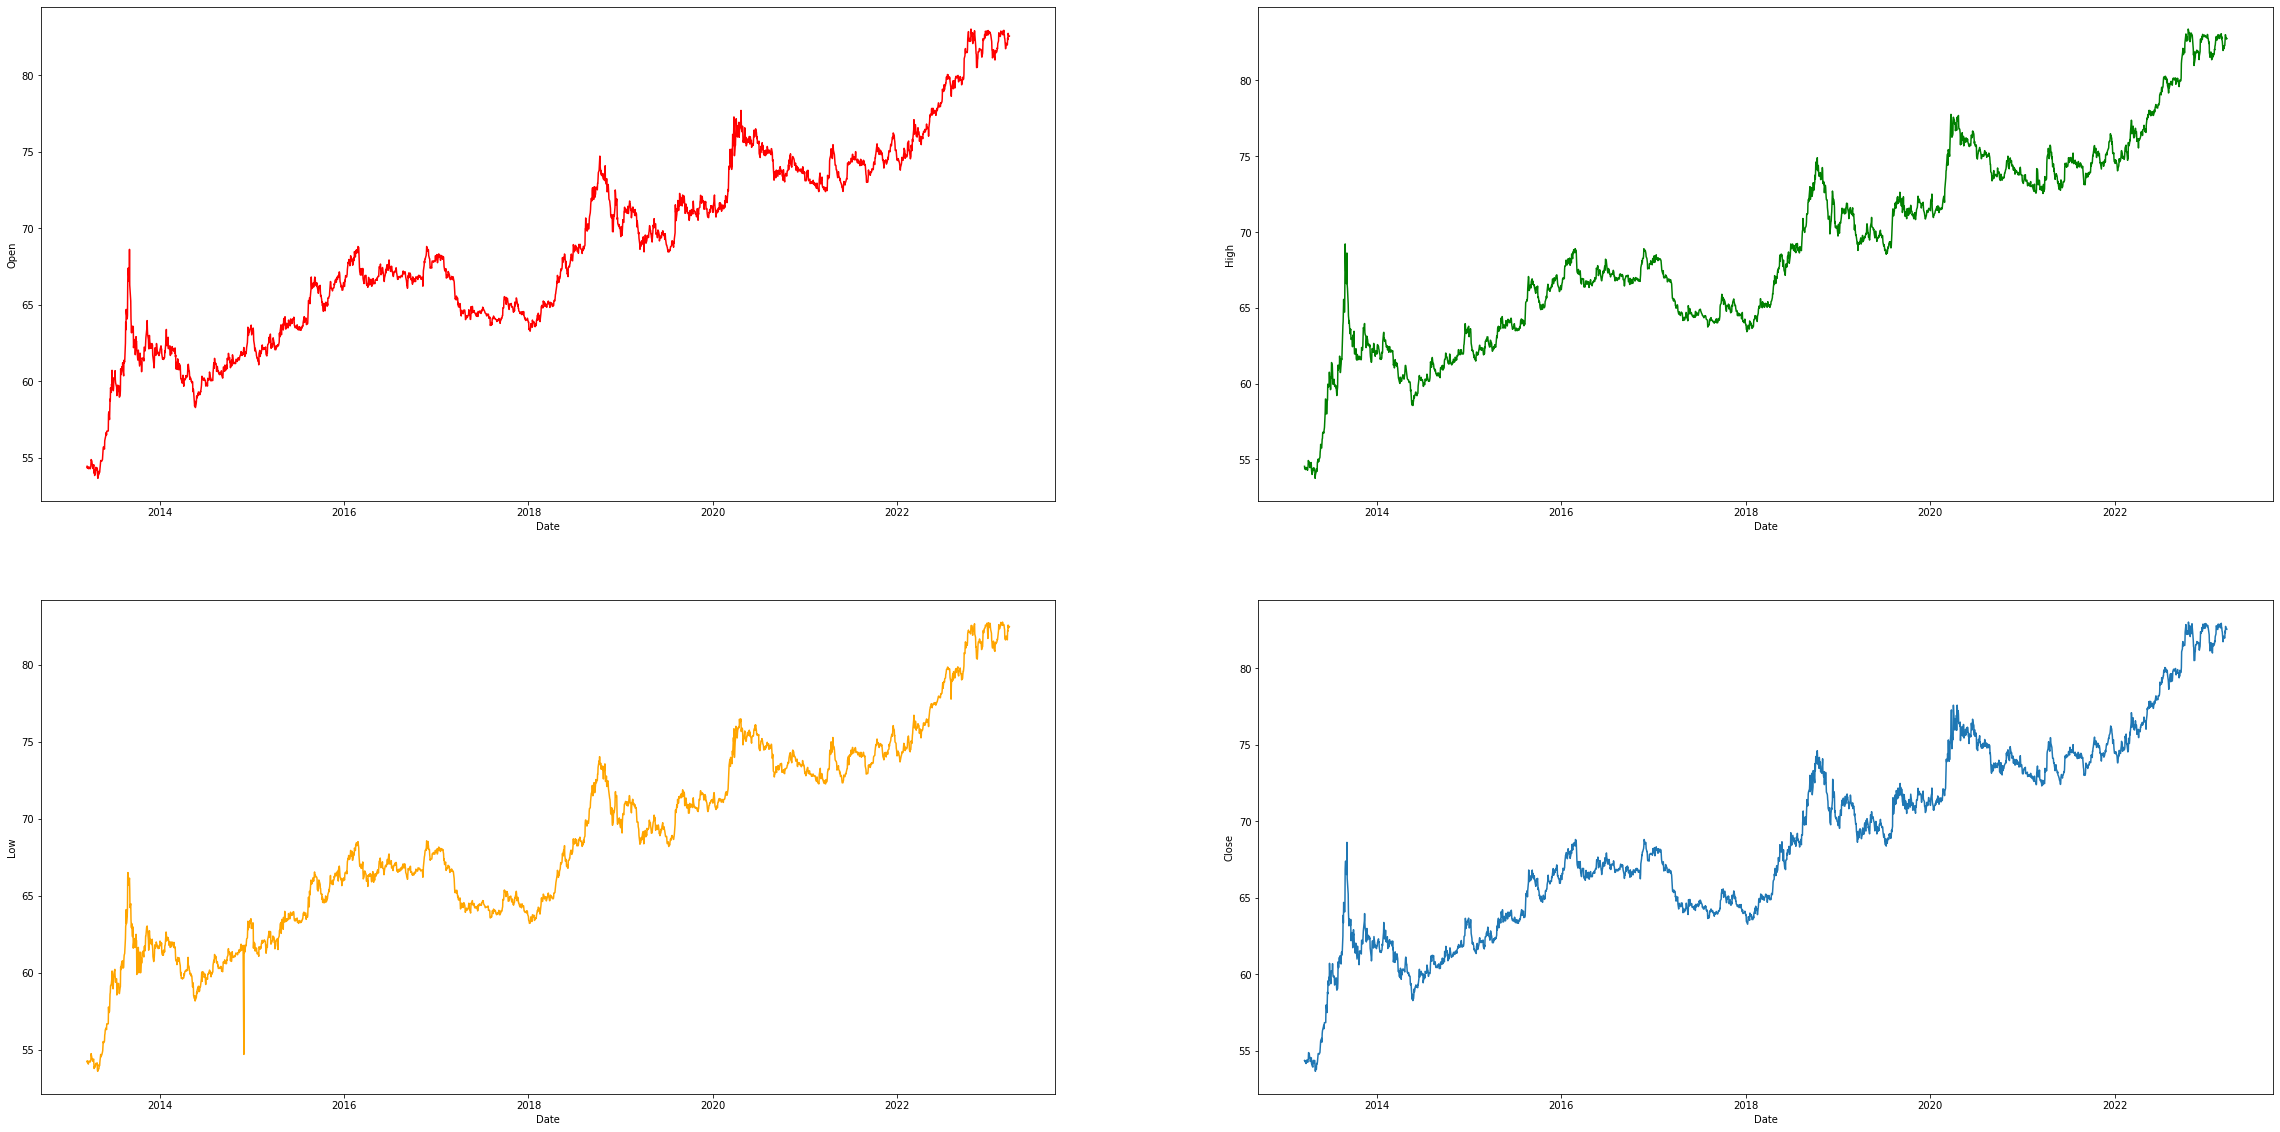

In [ ]:
# Viewing trends of all attributes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(40,20))
sns.lineplot(data=forex_data['Open'], ax=ax[0,0],color='red')
sns.lineplot(data=forex_data['High'], ax=ax[0,1],color='green')
sns.lineplot(data=forex_data['Low'], ax=ax[1,0],color='orange')
sns.lineplot(data=forex_data['Close'], ax=ax[1,1])

In [ ]:
# Splitting data into independent and dependent variables
X = forex_data[['Open','High','Low']]
y = forex_data[['Close']]
print(X.shape)
print(y.shape)

(2606, 3)
(2606, 1)


In [ ]:
X = X[::-1]
y = y[::-1]

In [ ]:
#Viewing top 5 entries of Independent variables
X[:5]

,Open,High,Low
Date,,,
2013-03-20,54.443001,54.537998,54.257999
2013-03-21,54.323002,54.368000,54.182999
2013-03-22,54.423000,54.426998,54.257999
2013-03-25,54.320000,54.320000,54.070000
2013-03-26,54.286999,54.463001,54.153000


In [ ]:
#Viewing top 5 entries of dependent variable
y[:5]

,Close
Date,
2013-03-20,54.368000
2013-03-21,54.349998
2013-03-22,54.278000
2013-03-25,54.342999
2013-03-26,54.167999


In [ ]:
# Normalizing data for better outputs
model = StandardScaler()
model.fit_transform(X)
model.fit_transform(y)

array([[-2.28947055],
       [-2.29233176],
       [-2.3037754 ],
       ...,
       [ 2.2014175 ],
       [ 2.18714357],
       [ 2.18652392]])

In [ ]:
# Splitting data into test and trainng in the 80% and 20% respectively
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)

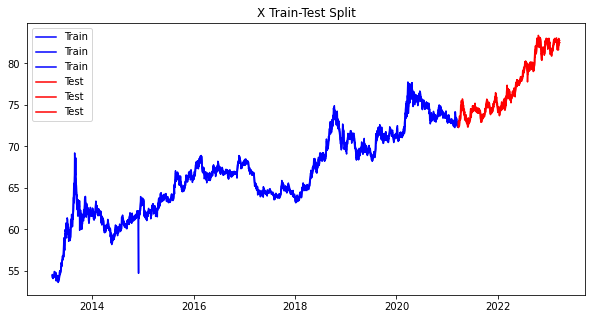

In [ ]:
# Visualizing trainng and testing data of X
plt.figure(figsize=(10,5))
plt.title('X Train-Test Split')
plt.plot(X_train, label = 'Train', color = 'b')
plt.plot(X_test, label = 'Test', color = 'r')
plt.legend()

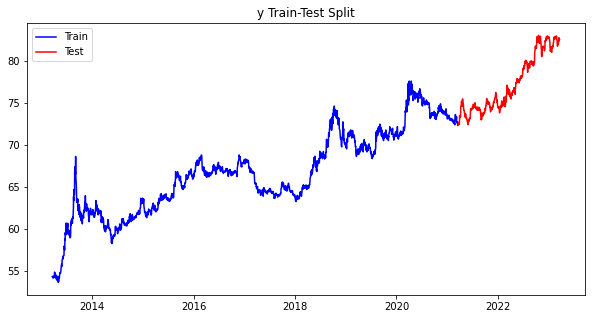

In [ ]:
# Visualizing training and testing data of y
plt.figure(figsize=(10,5))
plt.title('y Train-Test Split')
plt.plot(y_train, label = 'Train', color = 'b')
plt.plot(y_test, label = 'Test', color = 'r')
plt.legend()

In [ ]:
# Trainning the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Make predictions
y_pred = model.predict(X_test)
y_pred[:5]

array([[72.47991366],
       [72.40844431],
       [72.67788867],
       [72.71513307],
       [72.61887165]])

In [ ]:
a = np.array([[83.012497,82.185501,	82.304901]])
pr = model.predict(a)
print('Predicted: ',pr,'Actual: ',forex_data['Close'][3])

Predicted:  [[82.90031626]] Actual:  82.7156982421875


In [ ]:
# Checking the accuracy of model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.003265622207995494
Mean Absolute Error: 0.04719150139710301
R-squared: 0.9997066947599101


In [ ]:
# Storing all the predicted values
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
pred

,Predicted
0,72.479914
1,72.408444
2,72.677889
3,72.715133
4,72.618872
...,...
517,82.416137
518,82.775449
519,82.673501
520,82.584710


In [ ]:
ytest = y_test
ytest = ytest.reset_index()

In [ ]:
# Storing actual and predicted values
graph = pd.concat([ytest,pred],axis=1)
graph.index = pd.to_datetime(graph['Date'])
graph = graph.drop('Date', axis=1)
graph

,Close,Predicted
Date,,
2021-03-22,72.404999,72.479914
2021-03-23,72.380501,72.408444
2021-03-24,72.612198,72.677889
2021-03-25,72.645599,72.715133
2021-03-26,72.612801,72.618872
...,...,...
2023-03-15,82.304901,82.416137
2023-03-16,82.715698,82.775449
2023-03-17,82.622803,82.673501


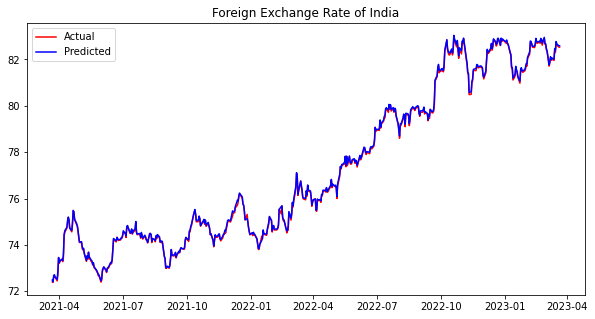

In [ ]:
# Plotting actual and predicted values
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(graph['Close'], label = 'Actual', color = 'r')
plt.plot(graph['Predicted'], label = 'Predicted', color = 'b')
plt.legend()

###Conclusion

In conclusion, the INR exchange rate prediction using linear regression on Python has been a useful and effective tool for analyzing and forecasting exchange rates. By utilizing historical data and applying statistical techniques, we can develop models that accurately predict exchange rate trends and movements. However, it's important to note that exchange rates are subject to a variety of external factors such as political events, global economic conditions, and investor sentiment, which can make them unpredictable at times.

The linear regression model used in this analysis has provided insights into the potential future direction of INR exchange rates, but it's important to continuously monitor and adjust the model as new data becomes available to ensure its accuracy. Moreover, it's important to take into account other factors such as inflation rates, interest rates, and government policies when making financial decisions based on exchange rate forecasts.

Overall, the use of linear regression on Python for INR exchange rate prediction is a valuable tool for businesses, investors, and individuals who seek to understand and make informed decisions about the foreign exchange market.
